In [68]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import scipy.stats as st
import numpy as np

#disabled 'SettingWithCopyWarning'
pd.options.mode.chained_assignment = None


In [2]:
# Data compiled by the National Skills Commission through job boards such as Seek, CareerOne and Australian JobSearch
# link- https://labourmarketinsights.gov.au/our-research/internet-vacancy-index/#3
job_vacancydf = pd.read_csv('Resources/internet_vacancy.csv')
job_vacancydf.dropna(inplace=True)

C:\Users\tycoo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Total columns
column_total = len(job_vacancydf.columns)
column_total



196

In [4]:
# Retained columns from 2018 onwards
df_reduced = job_vacancydf.drop(job_vacancydf.iloc[:, 3:145], axis=1)
df_reduced.head()


,ANZSCO_CODE,ANZSCO_TITLE,state,Jan-18,Feb-18,Mar-18,Apr-18,May-18,Jun-18,Jul-18,...,Jun-21,Jul-21,Aug-21,Sep-21,Oct-21,Nov-21,Dec-21,Jan-22,Feb-22,Mar-22
0,0,Australia Total,AUST,"161,651","163,169","185,851","182,882","188,690","185,265","189,843",...,"228,280","232,719","230,971","235,364","247,913","263,291","243,904","240,995","243,392","288,689"
1,1111,Chief Executives and Managing Directors,AUST,302,278,330,338,367,376,389,...,402,428,457,463,447,433,384,359,373,431
2,1112,General Managers,AUST,448,469,517,481,490,477,509,...,521,547,561,583,573,611,574,597,607,681
3,.,Legislators,AUST,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
4,1211,Aquaculture Farmers,AUST,1,1,1,0,0,0,0,...,0,1,1,1,0,0,1,1,1,0


In [5]:
# Filtered out rows with values equal to ".""
clean_vacancy = df_reduced.loc[df_reduced['ANZSCO_CODE']!='.',:]
clean_vacancy.head()

,ANZSCO_CODE,ANZSCO_TITLE,state,Jan-18,Feb-18,Mar-18,Apr-18,May-18,Jun-18,Jul-18,...,Jun-21,Jul-21,Aug-21,Sep-21,Oct-21,Nov-21,Dec-21,Jan-22,Feb-22,Mar-22
0,0,Australia Total,AUST,"161,651","163,169","185,851","182,882","188,690","185,265","189,843",...,"228,280","232,719","230,971","235,364","247,913","263,291","243,904","240,995","243,392","288,689"
1,1111,Chief Executives and Managing Directors,AUST,302,278,330,338,367,376,389,...,402,428,457,463,447,433,384,359,373,431
2,1112,General Managers,AUST,448,469,517,481,490,477,509,...,521,547,561,583,573,611,574,597,607,681
4,1211,Aquaculture Farmers,AUST,1,1,1,0,0,0,0,...,0,1,1,1,0,0,1,1,1,0
5,1212,Crop Farmers,AUST,13,11,8,7,8,11,14,...,32,34,31,38,34,34,25,22,15,18


In [6]:
# Changed column datatype from object to integer and also had to remove the commas from the values
clean_vacancy[clean_vacancy.columns[3:]] = clean_vacancy[clean_vacancy.columns[3:]].replace(',','',regex=True).astype(int)
clean_vacancy.head()

,ANZSCO_CODE,ANZSCO_TITLE,state,Jan-18,Feb-18,Mar-18,Apr-18,May-18,Jun-18,Jul-18,...,Jun-21,Jul-21,Aug-21,Sep-21,Oct-21,Nov-21,Dec-21,Jan-22,Feb-22,Mar-22
0,0,Australia Total,AUST,161651,163169,185851,182882,188690,185265,189843,...,228280,232719,230971,235364,247913,263291,243904,240995,243392,288689
1,1111,Chief Executives and Managing Directors,AUST,302,278,330,338,367,376,389,...,402,428,457,463,447,433,384,359,373,431
2,1112,General Managers,AUST,448,469,517,481,490,477,509,...,521,547,561,583,573,611,574,597,607,681
4,1211,Aquaculture Farmers,AUST,1,1,1,0,0,0,0,...,0,1,1,1,0,0,1,1,1,0
5,1212,Crop Farmers,AUST,13,11,8,7,8,11,14,...,32,34,31,38,34,34,25,22,15,18


In [7]:
# Getting the sum of job vacancies per year and adding each as a column in the dataframe
clean_vacancy['2018'] = clean_vacancy.loc[:,clean_vacancy.columns.str.endswith('-18')].sum(axis=1)
clean_vacancy['2019'] = clean_vacancy.loc[:,clean_vacancy.columns.str.endswith('-19')].sum(axis=1)
clean_vacancy['2020'] = clean_vacancy.loc[:,clean_vacancy.columns.str.endswith('-20')].sum(axis=1)
clean_vacancy['2021'] = clean_vacancy.loc[:,clean_vacancy.columns.str.endswith('-21')].sum(axis=1)

In [8]:
vacancy_table = clean_vacancy[['ANZSCO_CODE', 'ANZSCO_TITLE', 'state', '2018', '2019','2020','2021']]
vacancy_table.head()


,ANZSCO_CODE,ANZSCO_TITLE,state,2018,2019,2020,2021
0,0,Australia Total,AUST,2188439,2075915,1650014,2694099
1,1111,Chief Executives and Managing Directors,AUST,4145,4132,3310,5002
2,1112,General Managers,AUST,5784,5521,4370,6343
4,1211,Aquaculture Farmers,AUST,6,11,7,4
5,1212,Crop Farmers,AUST,137,218,164,332


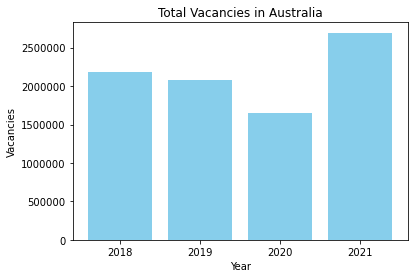

In [9]:
# Bar chart showing total job vacancies in Australia
aus_vacancy = vacancy_table.iloc[0,3:]
x_axisvacancy = np.arange(len(aus_vacancy))
plt.bar(x_axisvacancy, aus_vacancy, color='skyblue', align='center')
ticks = aus_vacancy.index
tick_locations = [value for value in x_axisvacancy]
plt.xticks(tick_locations, ticks)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Year')
plt.ylabel('Vacancies')
plt.title('Total Vacancies in Australia');

In [69]:
#Total number of job vacancies per state
# 
vacancy_per_state = vacancy_table.loc[(vacancy_table['state']!='AUST') & (vacancy_table['ANZSCO_CODE']!= '0'),:]
vac_per_state=vacancy_per_state.groupby('state')
vatot_per_state = vac_per_state.sum()
growth19_20= (vatot_per_state['2021'] - vatot_per_state['2019'])/ (vatot_per_state['2019'])*100
vatot_per_state['Growth 2019 vs 2021'] = growth19_20
vatot_per_state

,2018,2019,2020,2021,Growth 2019 vs 2021
state,,,,,
ACT,64268,68609,59391,79278,15.550438
NSW,812647,734516,554069,863222,17.522559
NT,22547,20090,18329,30466,51.647586
QLD,392197,375187,329247,527441,40.580830
SA,92063,91897,86229,143471,56.121527
TAS,19918,21832,18505,33292,52.491755
VIC,587741,563809,386464,699814,24.122531
WA,189867,192017,189246,305345,59.019774


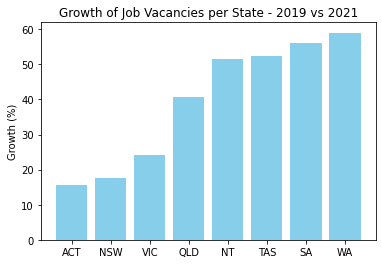

In [77]:
vatot_per_state = vatot_per_state.sort_values('Growth 2019 vs 2021')
vactotal_chart = plt.bar(vatot_per_state.index, vatot_per_state['Growth 2019 vs 2021'], color='skyblue')
plt.title('Growth of Job Vacancies per State - 2019 vs 2021')
plt.ylabel('Growth (%)');
plt.savefig('Images/Job_Vacancies_perState.png')

In [11]:
# Calculating total job vacancies per state
wa_vacancy = vacancy_per_state.loc[(vacancy_per_state['state']=='WA'),:]
wa_vacancytot = wa_vacancy.iloc[:,3:].sum()
nsw_vacancy = vacancy_per_state.loc[(vacancy_per_state['state']=='NSW'),:]
nsw_vacancytot = nsw_vacancy.iloc[:,3:].sum()
act_vacancy = vacancy_per_state.loc[(vacancy_per_state['state']=='ACT'),:]
act_vacancytot = act_vacancy.iloc[:,3:].sum()
nt_vacancy = vacancy_per_state.loc[(vacancy_per_state['state']=='NT'),:]
nt_vacancytot = nt_vacancy.iloc[:,3:].sum()
qld_vacancy = vacancy_per_state.loc[(vacancy_per_state['state']=='QLD'),:]
qld_vacancytot = qld_vacancy.iloc[:,3:].sum()
tas_vacancy = vacancy_per_state.loc[(vacancy_per_state['state']=='TAS'),:]
tas_vacancytot = tas_vacancy.iloc[:,3:].sum()
sa_vacancy = vacancy_per_state.loc[(vacancy_per_state['state']=='SA'),:]
sa_vacancytot = sa_vacancy.iloc[:,3:].sum()
vic_vacancy = vacancy_per_state.loc[(vacancy_per_state['state']=='VIC'),:]
vic_vacancytot = vic_vacancy.iloc[:,3:].sum()

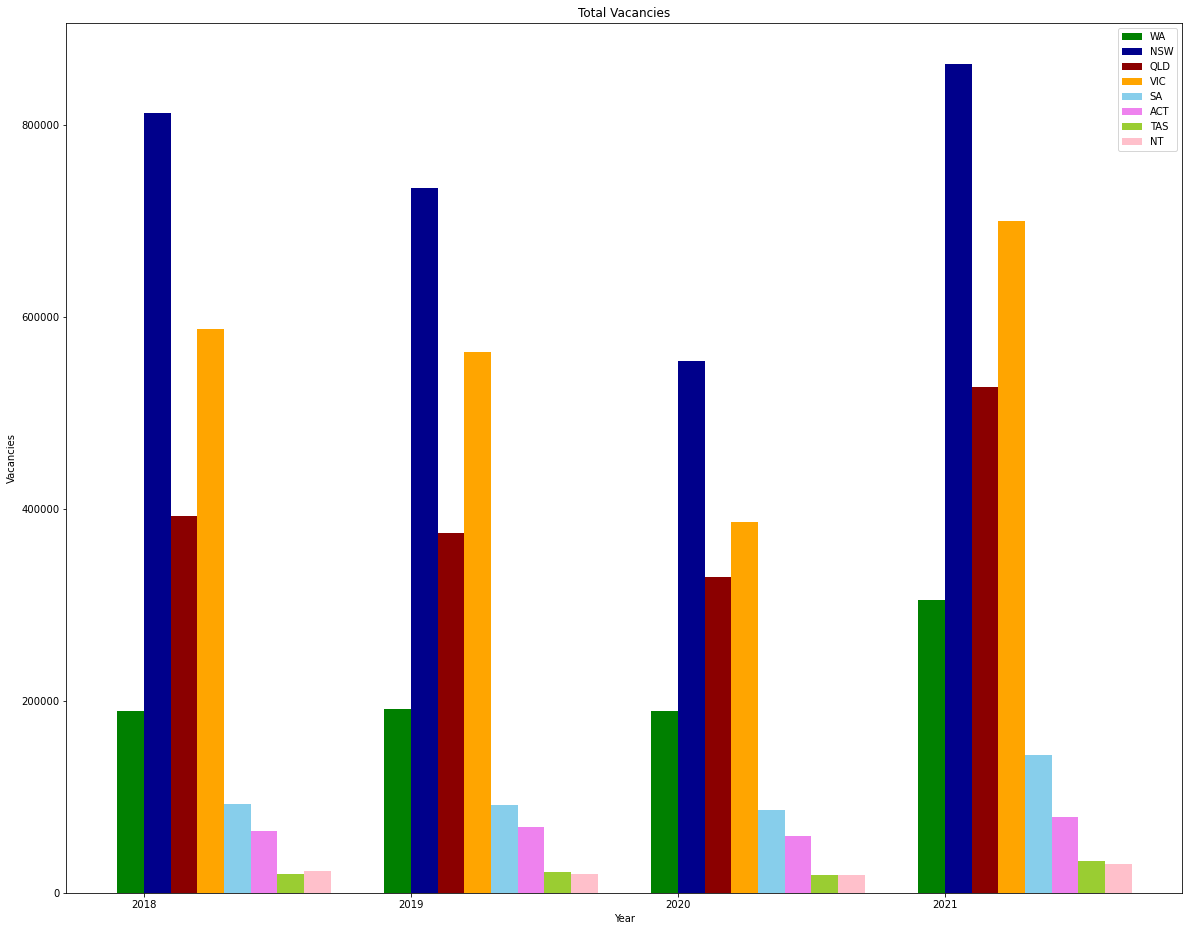

In [12]:
#Bar chart showing total job vacancies per state
N=4
ind=np.arange(N)
x_axisbar = np.arange(len(wa_vacancytot))
width = 0.10
fig,bars = plt.subplots(figsize=(20,16))

bar1=plt.bar(ind, wa_vacancytot, width=width, color='green')
bar2=plt.bar(ind+width, nsw_vacancytot, width = width, color='darkblue')
bar3=plt.bar(ind+width*2, qld_vacancytot, width = width, color='darkred')
bar4=plt.bar(ind+width*3, vic_vacancytot, width = width, color='orange')
bar5=plt.bar(ind+width*4, sa_vacancytot, width=width, color='skyblue')
bar6=plt.bar(ind+width*5, act_vacancytot, width = width, color='violet')
bar7=plt.bar(ind+width*6, tas_vacancytot, width = width, color='yellowgreen')
bar8=plt.bar(ind+width*7, nt_vacancytot, width = width, color='pink')

bars.ticklabel_format(style='plain', axis='y')
bars.set_xticks(ind + width/2)
bars.set_xticklabels(('2018','2019','2020','2021'))
plt.xlabel('Year')
plt.ylabel('Vacancies')
plt.title('Total Vacancies')
plt.legend((bar1, bar2, bar3, bar4, bar5, bar6,bar7,bar8), ('WA', 'NSW', 'QLD', 'VIC', 'SA', 'ACT', 'TAS','NT'))
plt.show()

In [33]:
# Dataframe showing top 10 with most vacancies per job position in the last 4 years
vacancy_per_job = vacancy_per_state.groupby('ANZSCO_TITLE')
vac_per_job = vacancy_per_job.sum()
vac_per_job.style.format("{:,.0f}")
vac_per_jobgrowth1921 = (vac_per_job['2021']- vac_per_job['2019'])/(vac_per_job['2019'])*100
vac_per_job['Growth 2019 vs 2021'] = vac_per_jobgrowth1921.map("{:,.2f}%".format)
vac_per_jobgrowth1821 = (vac_per_job['2021']- vac_per_job['2018'])/(vac_per_job['2018'])*100
vac_per_job['Growth 2018 vs 2021'] = vac_per_jobgrowth1821.map("{:,.2f}%".format)
vac_per_job.nlargest(n=10, columns=['2018','2019','2020','2021'])

,2018,2019,2020,2021,Growth 2019 vs 2021,Growth 2018 vs 2021
ANZSCO_TITLE,,,,,,
General Clerks,104283,100291,75596,132628,32.24%,27.18%
Sales Assistants (General),89851,79196,64335,117721,48.65%,31.02%
Advertising and Sales Managers,77125,69629,42592,64116,-7.92%,-16.87%
Software and Applications Programmers,73954,72761,55361,85346,17.30%,15.40%
Construction Managers,52529,45524,28943,45269,-0.56%,-13.82%
Accountants,51933,47571,30984,41341,-13.10%,-20.40%
Registered Nurses,48448,52954,52054,84582,59.73%,74.58%
Other Miscellaneous Labourers,44394,36472,33421,53101,45.59%,19.61%
ICT Business and Systems Analysts,36477,35575,24853,39164,10.09%,7.37%


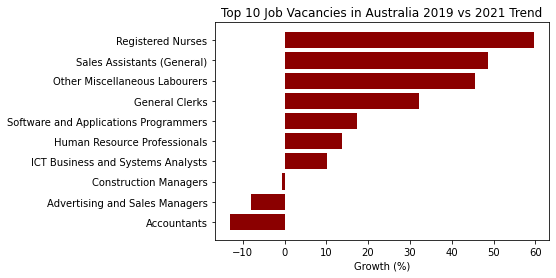

In [78]:
vac_per_jobtab = vac_per_job.nlargest(n=10, columns=['2018','2019','2020','2021'])
vac_per_jobtab = vac_per_jobtab.sort_values('Growth 2019 vs 2021')
auvac_bar = plt.barh(vac_per_jobtab.index, vac_per_jobtab['Growth 2019 vs 2021'], color='darkred')
plt.title('Top 10 Job Vacancies in Australia 2019 vs 2021 Trend')
plt.xlabel('Growth (%)');
plt.savefig('Images/Top10Job_Vacancies_Australia.png')

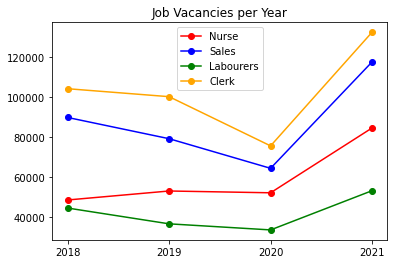

In [80]:
# Total job vacancies per year for Registered Nurses, Sales Assistants, Labourers and Clerks
reg_nurse = vacancy_per_state.loc[(vacancy_per_state['ANZSCO_TITLE']=='Registered Nurses'),:]
reg_nursetot = reg_nurse.iloc[:,3:].sum()


reg_sales = vacancy_per_state.loc[(vacancy_per_state['ANZSCO_TITLE']=='Sales Assistants (General)'),:]
reg_salestot = reg_sales.iloc[:,3:].sum()

reg_labour = vacancy_per_state.loc[(vacancy_per_state['ANZSCO_TITLE']=='Other Miscellaneous Labourers'),:]
reg_labourtot = reg_labour.iloc[:,3:].sum()

reg_clerk = vacancy_per_state.loc[(vacancy_per_state['ANZSCO_TITLE']=='General Clerks'),:]
reg_clerktot = reg_clerk.iloc[:,3:].sum()

x_axisplot = ['2018','2019','2020','2021']

plt.plot(x_axisplot, reg_nursetot, marker = 'o', color = 'red', label='Nurse')
plt.plot(x_axisplot, reg_salestot, marker = 'o', color = 'blue', label='Sales')
plt.plot(x_axisplot, reg_labourtot, marker = 'o', color = 'green', label='Labourers')
plt.plot(x_axisplot, reg_clerktot, marker = 'o', color = 'orange', label='Clerk')
plt.title('Job Vacancies per Year')
plt.legend(loc='best')
plt.savefig('Images/Job_Vacancy_Comparison.png')

In [21]:
# Dataframe showing top 10 WA job vacancies in the last 4 years
wavacancy_per_job = vacancy_per_state.loc[vacancy_per_state['state']=='WA',:]
wavacancytop = wavacancy_per_job.nlargest(n=10, columns=['2018','2019','2020','2021'])
wavacancytop.sort_values(by=['2021'], ascending= False)

,ANZSCO_CODE,ANZSCO_TITLE,state,2018,2019,2020,2021
2041,5311,General Clerks,WA,7960,8497,8057,14704
2073,6211,Sales Assistants (General),WA,6742,5842,6568,12563
1953,3232,Metal Fitters and Machinists,WA,6439,6900,6128,8065
1948,3212,Motor Mechanics,WA,4987,5358,5323,8046
1917,2544,Registered Nurses,WA,3736,3635,3977,6768
2153,8999,Other Miscellaneous Labourers,WA,3842,3631,4287,6686
1951,3223,Structural Steel and Welding Trades Workers,WA,4220,3521,3750,5940
1803,1311,Advertising and Sales Managers,WA,4363,3811,2942,4656
1920,2613,Software and Applications Programmers,WA,3817,4063,3334,4539
1842,2211,Accountants,WA,3993,3657,2697,3748


In [16]:
# Dataframe showing top 10 WA job vacancies for 2021
wavacancy_per_job2021 = wavacancy_per_job[['ANZSCO_TITLE', '2021']]
wavacancy_per_job2021.sort_values('2021', ascending= False).head(10)

,ANZSCO_TITLE,2021
2041,General Clerks,14704
2073,Sales Assistants (General),12563
1953,Metal Fitters and Machinists,8065
1948,Motor Mechanics,8046
1917,Registered Nurses,6768
2153,Other Miscellaneous Labourers,6686
1968,Electricians,6385
1951,Structural Steel and Welding Trades Workers,5940
2108,Truck Drivers,5104
1875,Mining Engineers,4875


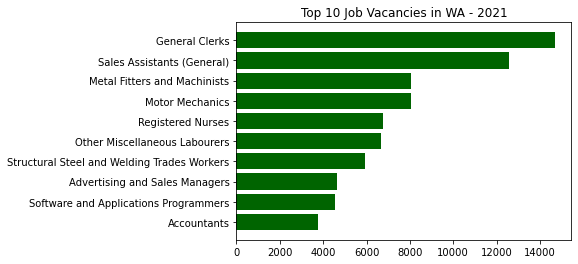

In [81]:
#Bar chart showing top 10 WA job vacancies for 2021
wavacancytop = wavacancytop.sort_values('2021')
job_bar1 = plt.barh(wavacancytop['ANZSCO_TITLE'], wavacancytop['2021'], data= wavacancytop, color='darkgreen')
plt.title('Top 10 Job Vacancies in WA - 2021');
plt.savefig('Images/Top10_Vacancies_WA.png')

In [21]:
# Dataframe showing top 10 SA job vacancies in the last 4 years
savacancy_per_job = vacancy_per_state.loc[vacancy_per_state['state']=='SA',:]
savacancytop = savacancy_per_job.nlargest(n=10, columns=['2018','2019','2020','2021'])
savacancytop.head(10)

,ANZSCO_CODE,ANZSCO_TITLE,state,2018,2019,2020,2021
1682,5311,General Clerks,SA,4621,4618,4281,8089
1714,6211,Sales Assistants (General),SA,4012,3806,4004,7096
1558,2544,Registered Nurses,SA,2872,3734,3024,4961
1794,8999,Other Miscellaneous Labourers,SA,2626,2524,2583,3785
1561,2613,Software and Applications Programmers,SA,2288,2496,1947,3331
1589,3212,Motor Mechanics,SA,2052,1858,1623,2697
1444,1311,Advertising and Sales Managers,SA,1915,1738,1421,2310
1483,2211,Accountants,SA,1710,1588,1180,1653
1749,7331,Truck Drivers,SA,1656,1138,1093,1858
1450,1331,Construction Managers,SA,1615,1443,1277,2238


In [22]:
# Dataframe showing top 10 TAS job vacancies in the last 4 years
tasvacancy_per_job = vacancy_per_state.loc[vacancy_per_state['state']=='TAS',:]
tasvacancytop = tasvacancy_per_job.nlargest(n=10, columns=['2018','2019','2020','2021'])
tasvacancytop.head(10)

,ANZSCO_CODE,ANZSCO_TITLE,state,2018,2019,2020,2021
2400,5311,General Clerks,TAS,1019,1154,986,1887
2276,2544,Registered Nurses,TAS,982,1005,969,1752
2432,6211,Sales Assistants (General),TAS,946,929,809,1607
2512,8999,Other Miscellaneous Labourers,TAS,470,499,348,643
2334,3513,Chefs,TAS,453,434,314,537
2307,3212,Motor Mechanics,TAS,385,455,363,662
2162,1311,Advertising and Sales Managers,TAS,343,360,292,531
2368,4231,Aged and Disabled Carers,TAS,339,406,400,548
2187,1421,Retail Managers,TAS,311,263,203,422
2376,4315,Waiters,TAS,302,267,195,435


In [23]:
# Dataframe showing top 10 NT job vacancies in the last 4 years
ntvacancy_per_job = vacancy_per_state.loc[vacancy_per_state['state']=='NT',:]
ntvacancytop = ntvacancy_per_job.nlargest(n=10, columns=['2018','2019','2020','2021'])
ntvacancytop.head(10)

,ANZSCO_CODE,ANZSCO_TITLE,state,2018,2019,2020,2021
2759,5311,General Clerks,NT,1268,1181,992,1728
2635,2544,Registered Nurses,NT,1091,846,908,1355
2791,6211,Sales Assistants (General),NT,801,696,569,1185
2671,3232,Metal Fitters and Machinists,NT,605,420,366,535
2666,3212,Motor Mechanics,NT,511,425,369,790
2871,8999,Other Miscellaneous Labourers,NT,476,393,395,606
2546,1421,Retail Managers,NT,409,399,348,512
2686,3411,Electricians,NT,384,353,322,554
2527,1331,Construction Managers,NT,384,298,303,486
2693,3513,Chefs,NT,371,335,300,524


In [24]:
# Dataframe showing top 10 NSW job vacancies in the last 4 years
nswvacancy_per_job = vacancy_per_state.loc[vacancy_per_state['state']=='NSW',:]
nswvacancy_per_job.nlargest(n=10, columns=['2018','2019','2020','2021'])

,ANZSCO_CODE,ANZSCO_TITLE,state,2018,2019,2020,2021
605,5311,General Clerks,NSW,38364,33739,24511,40870
367,1311,Advertising and Sales Managers,NSW,36936,33176,19260,27018
637,6211,Sales Assistants (General),NSW,34087,28725,21405,36081
484,2613,Software and Applications Programmers,NSW,31147,29124,22049,34032
406,2211,Accountants,NSW,21982,19113,12082,15708
373,1331,Construction Managers,NSW,21891,17539,10540,15576
482,2611,ICT Business and Systems Analysts,NSW,16405,15091,10698,16427
411,2231,Human Resource Professionals,NSW,15478,14670,8103,13626
481,2544,Registered Nurses,NSW,14649,17087,19549,31484
717,8999,Other Miscellaneous Labourers,NSW,13923,11103,9232,14979


In [25]:
# Dataframe showing top 10 QLD job vacancies in the last 4 years

# There was not a significant decrease on vacancies for Sales Assistants between 2019 and 2020 however there is a huge increase in demand. Looking between 2019 and 2021, there is 69% growth in vacancies.
# General Clerks had a similar trend and had 36% growth in demand between 2019 and 2021.
qldvacancy_per_job = vacancy_per_state.loc[vacancy_per_state['state']=='QLD',:]
qldvacancy_per_job.nlargest(n=10, columns=['2018','2019','2020','2021'])

,ANZSCO_CODE,ANZSCO_TITLE,state,2018,2019,2020,2021
1323,5311,General Clerks,QLD,18969,18871,15519,25816
1355,6211,Sales Assistants (General),QLD,15994,14680,14184,24851
1435,8999,Other Miscellaneous Labourers,QLD,11668,8752,9225,13499
1199,2544,Registered Nurses,QLD,10608,11339,10485,14966
1085,1311,Advertising and Sales Managers,QLD,9586,9269,6383,9874
1202,2613,Software and Applications Programmers,QLD,9456,9903,7187,11207
1124,2211,Accountants,QLD,8476,8257,5550,7389
1235,3232,Metal Fitters and Machinists,QLD,7830,7001,5378,7796
1091,1331,Construction Managers,QLD,7325,6559,4288,7489
1230,3212,Motor Mechanics,QLD,6519,5657,5131,8715


In [21]:
# Dataframe showing top 10 VIC job vacancies in the last 4 years
# Sales Assistants (General) decreased by 32% from 2019 - 2020 however the vacancies increased by 109% from 2020-2021
vicvacancy_per_job = vacancy_per_state.loc[vacancy_per_state['state']=='VIC',:]
vicvacancy_per_job.nlargest(n=10, columns=['2018','2019','2020','2021'])

,ANZSCO_CODE,ANZSCO_TITLE,state,2018,2019,2020,2021
964,5311,General Clerks,VIC,28047,27591,17236,33856
996,6211,Sales Assistants (General),VIC,25331,22624,15323,32080
726,1311,Advertising and Sales Managers,VIC,22475,19765,11254,18129
843,2613,Software and Applications Programmers,VIC,21186,21230,14695,25182
732,1331,Construction Managers,VIC,15768,14578,7832,12325
765,2211,Accountants,VIC,13968,13031,8073,11185
840,2544,Registered Nurses,VIC,13548,14360,12266,22097
1076,8999,Other Miscellaneous Labourers,VIC,10416,8472,6500,12027
841,2611,ICT Business and Systems Analysts,VIC,9467,9161,5712,10494
770,2231,Human Resource Professionals,VIC,9407,8978,4778,10479
